In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import pycountry_convert as pc
from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 12})

C:\Program Files\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df.rename(columns = {'Country/Region':'Country'}, inplace = True)
df.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


In [3]:
dff = df.drop(['Province/State', 'Lat', 'Long'], axis = 1)
dff.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,Albania,0,0,0,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,Algeria,0,0,0,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,Andorra,0,0,0,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,Angola,0,0,0,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


In [4]:
dff = dff.replace(to_replace ='Burma',value ='Myanmar') 
dff = dff.replace(to_replace ='Congo (Brazzaville)',value ='Congo') 
dff = dff.replace(to_replace ='Congo (Kinshasa)',value ='Congo')
dff = dff.replace(to_replace ="Cote d'Ivoire",value ="Côte d'Ivoire")
dff = dff.replace(to_replace ="Diamond Princess",value ="United Kingdom")
dff = dff.replace(to_replace ="Holy See",value ="Italy")
dff = dff.replace(to_replace ="Korea, South",value ="South Korea")
dff = dff.replace(to_replace ="Kosovo",value ="Serbia")
dff = dff.replace(to_replace ="MS Zaandam",value ="Netherlands")
dff = dff.replace(to_replace ="Taiwan*",value ="Taiwan")
dff = dff.replace(to_replace ="US",value ="USA")
dff = dff.replace(to_replace ="West Bank and Gaza",value ="Egypt")
dff=dff.groupby(['Country'],as_index=False).sum()
dfff=dff[['Country']]
dff = dff.replace(to_replace ="United Kindom",value ="UK")
dff = dff.replace(to_replace ="United Arab Emirates",value ="UAE")

In [5]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    if (country_alpha2 == 'TL'):
        country_alpha2 = 'IN'
    if (country_alpha2 == 'EH'):
        country_alpha2 = 'NA'    
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [6]:
dfff.columns

Index(['Country'], dtype='object')

In [7]:
ccodes = [country_to_continent(country) for country in dfff['Country'].tolist()] 

In [8]:
dfff['ccodes']=ccodes
dfff = dfff.replace(to_replace ="United Kindom",value ="UK")
dfff = dfff.replace(to_replace ="United Arab Emirates",value ="UAE")
dfff.head()

,Country,ccodes
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [9]:
colors2 = dict(zip(
    ['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'],
    ["#5825ff", "#d7421b", "#9a6024", "#a3ad0b", "#ffa500", "#90d595",  "#f7bb5f"]
))
group_lk = dfff.set_index('Country')['ccodes'].to_dict()

In [10]:
dff.rename(columns = {'Country':'Date'}, inplace = True)
dff.set_index("Date", inplace = True)
dff = dff.transpose()
dff.head()

Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,UAE,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


In [11]:
def nice_axes(ax):
    ax.set_facecolor('white')
    ax.tick_params(labelsize=12, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    plt.rcParams.update({'font.size': 12})

In [12]:
dff_map=dff.sort_values(by='1/22/20', axis=1, ascending=True, inplace=False)
dff_map=dff_map[dff_map.columns[-15:]]

fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['1/23/20', '1/24/20', '1/25/20']
colors = plt.cm.Dark2(range(15))
for ax, date in zip(ax_array, dates):
    dff_map=dff.sort_values(by='3/29/20', axis=1, ascending=True, inplace=False)
    dff_map=dff_map[dff_map.columns[-15:]]
    s = dff_map.loc[date]
    y = dff_map.loc[date].rank(method='first').head(15).values
    ax.barh(y=y, width=s.values, color=[colors2[group_lk[x]] for x in dff_map.columns], tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [13]:
m=15
def prepare_data(df, steps=m):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['index'] = df_expanded['index'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('index')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(dff_map)

from scipy.misc import imread

img = imread(r"C:\Users\Prashant Vats\Desktop\covid_data - Modified\lena.jpg")
plt.scatter(x,y,zorder=1)
plt.imshow(img,zorder=0)
plt.show()

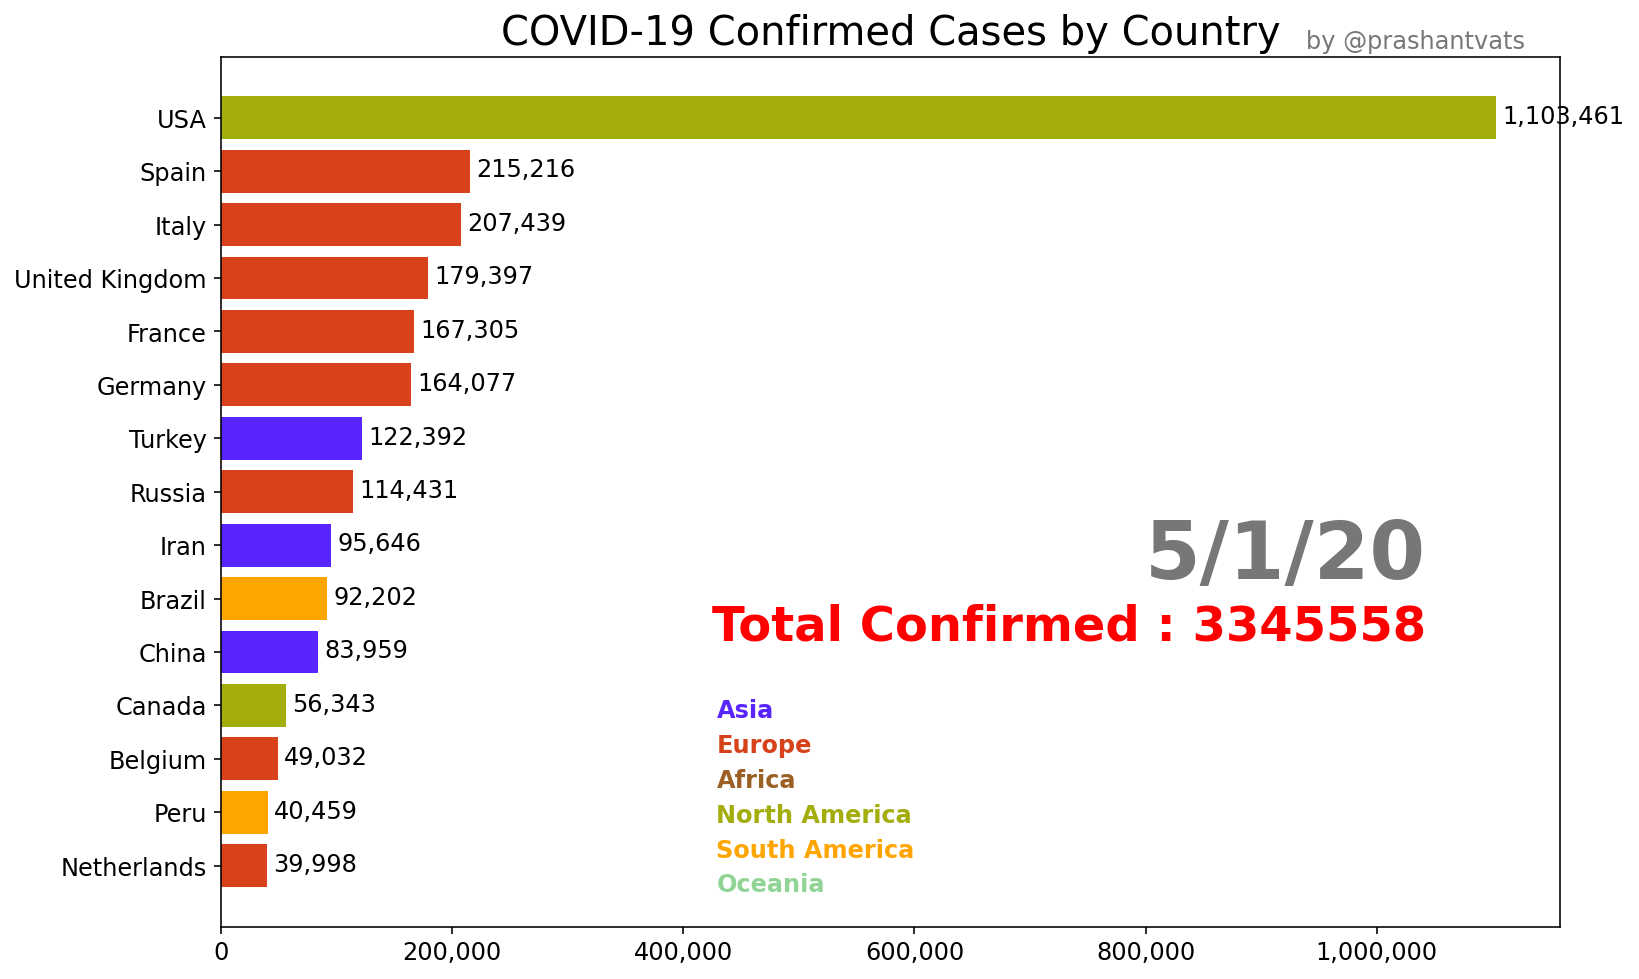

In [14]:
def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)
    plt.rcParams.update({'font.size': 12})

def update(i):
    ax.clear()
    plt.rcParams.update({'font.size': 12})
    dff_map=dff.sort_values(by=df_expanded.index[i], axis=1, ascending=True, inplace=False)
    dff_map=dff_map[dff_map.columns[-15:]]
    df_expanded_u, df_rank_expanded_u = prepare_data(dff_map)
    labels = df_expanded_u.columns
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded_u.iloc[i]
    width = df_expanded_u.iloc[i]
    dx = width.max() / 200
    ax.barh(y=y, width=width, color=[colors2[group_lk[x]] for x in df_expanded_u.columns], tick_label=labels)
    for k, (value, Country) in enumerate(zip(width, df_expanded_u.columns)):
        ax.text(value+dx, k+1-.2, f'{value:,.0f}',  size=12, ha='left',  va='bottom')
    date_str = df_expanded.index[i]
    ax.set_title(f'COVID-19 Confirmed Cases by Country', fontsize=20)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.text(.9, 0.4, f'{date_str}', transform=ax.transAxes, color='#777777', size=40, ha='right', weight=800)
    ax.text(.9, 0.33, 'Total Confirmed : ' + str(sum(dff.loc[f'{date_str}'])), transform=ax.transAxes, color='#FF0000', size=24, ha='right', weight=800)
    ax.text(.81, 1.01, 'by @prashantvats', transform=ax.transAxes, size=12, color='#777777') 
    pos =.28
    for cont in colors2:
        pos = pos-.04
        ax.text(.37, pos, cont, transform=ax.transAxes, size=12, color=colors2[cont],weight=1000)   
fig = plt.Figure(figsize=(12, 8), dpi=144)
ax = fig.add_subplot()    
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(dff)*m-m+1, 
                     interval=100, repeat=False)

update(1500)
fig

In [15]:
matplotlib.rcParams['animation.embed_limit'] = 2**128
plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\Prashant Vats\Downloads\ffmpeg-20200603-b6d7c4c-win64-static\ffmpeg-20200603-b6d7c4c-win64-static\bin\ffmpeg.exe'

In [16]:
f = r'C:\Users\Prashant Vats\Desktop\covid_data - Modified\Covid_Confirmed.mp4' 
writervid = animation.FFMpegWriter(fps=30)  

In [ ]:
anim.save(f, writer=writervid)